In [26]:
# Análise de Dados Econômicos com Fred e Pandas   

In [27]:

# Importação de Bibliotecas

import pandas as pd              # Manipulação de dados
import numpy as np               # Operações numéricas
import matplotlib.pyplot as plt  # Visualização estática
import plotly.express as px      # Visualização interativa
import time                      # Controle de tempo / delays
import os                        # Variáveis de ambiente

# Configurações de Visualização


plt.style.use('fivethirtyeight')  # Estilo visual moderno
pd.set_option('display.max_columns', 500)  # Mostrar até 500 colunas

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']


# Conexão com a API do FRED


from fredapi import Fred

# API Key armazenada de forma segura como variável de ambiente
fred_key = os.getenv("FRED_API_KEY")

fred = Fred(api_key=fred_key)


In [28]:

# Inicialização da conexão com o FRED

from fredapi import Fred

if fred_key is None:
    raise ValueError("FRED_API_KEY não encontrada. Configure a variável de ambiente antes de executar.")

fred = Fred(api_key=fred_key)

print("✅ Conexão com a API do FRED estabelecida com sucesso.")


✅ Conexão com a API do FRED estabelecida com sucesso.


In [29]:

# Buscando séries relacionadas ao S&P 500

sp_search = fred.search(
    text='S&P',
    order_by='popularity'
)

# Visualizar as 10 séries mais populares
sp_search.head(10)


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-13,2026-02-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-02-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-13 09:30:45-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-13,2026-02-13,S&P 500,2016-02-16,2026-02-12,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-12 19:02:06-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-13,2026-02-13,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,85,"For more information regarding the index, plea..."
BAMLC0A0CM,BAMLC0A0CM,2026-02-13,2026-02-13,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-02-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-13 09:31:52-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-13,2026-02-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-02-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-13 09:30:41-06:00,85,This data represents the effective yield of th...
DJIA,DJIA,2026-02-13,2026-02-13,Dow Jones Industrial Average,2016-02-16,2026-02-12,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-12 19:03:14-06:00,79,The observations for the Dow Jones Industrial ...
STLENI,STLENI,2026-02-13,2026-02-13,St. Louis Fed Economic News Index: Real GDP No...,2013-04-01,2025-10-01,Quarterly,Q,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2026-02-13 10:57:34-06:00,77,St. Louis Fed’s Economic News Index (ENI) uses...
BAMLHE00EHYIOAS,BAMLHE00EHYIOAS,2026-02-13,2026-02-13,ICE BofA Euro High Yield Index Option-Adjusted...,1997-12-31,2026-02-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-13 09:30:40-06:00,74,This data represents the Option-Adjusted Sprea...
CSUSHPISA,CSUSHPISA,2026-02-13,2026-02-13,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:15:29-06:00,74,"For more information regarding the index, plea..."


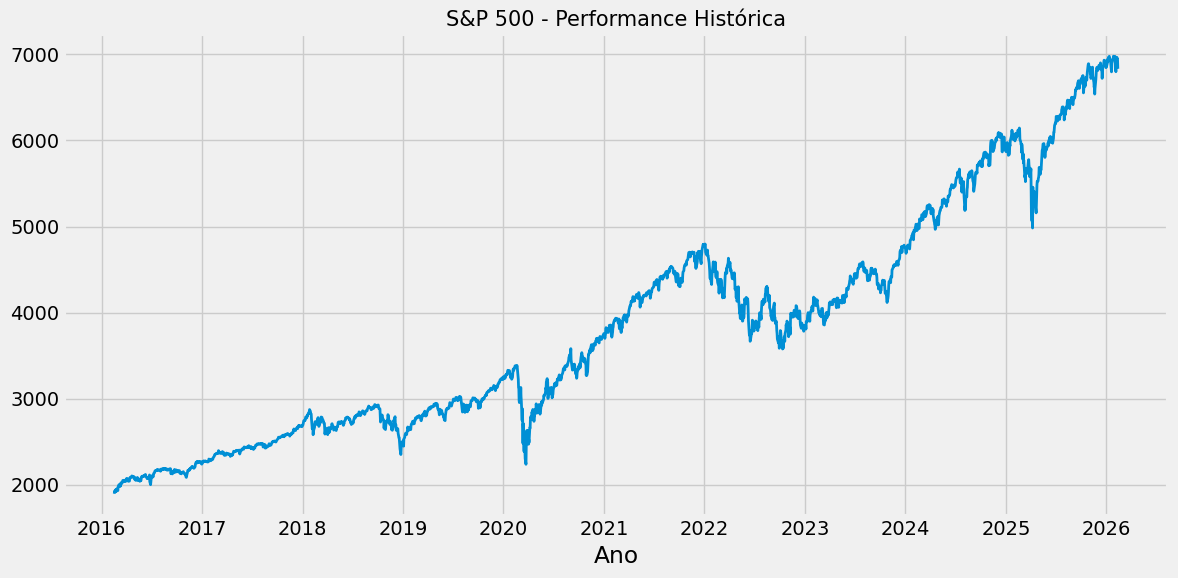

In [30]:

# Download da Série Histórica do S&P 500


sp500 = fred.get_series('SP500')

# Converter para DataFrame e organizar
sp500 = sp500.to_frame(name='SP500')
sp500.index = pd.to_datetime(sp500.index)

# Remover valores nulos (se existirem)
sp500 = sp500.dropna()


# Visualização

plt.figure(figsize=(12,6))

plt.plot(sp500.index, sp500['SP500'], linewidth=2)

plt.title('S&P 500 - Performance Histórica', fontsize=15)
plt.xlabel('Ano')
plt.tight_layout()

plt.show()


In [31]:

# Buscando Taxas de Desemprego por Estado (Mensal)


# Buscar séries relacionadas a desemprego estadual
unemp_df = fred.search(
    text='unemployment rate state',
    filter=('frequency', 'Monthly')
)

# Filtrar apenas séries:
# - Ajustadas sazonalmente
# - Unidade em Percentual
unemp_df = unemp_df[
    (unemp_df['seasonal_adjustment'] == "Seasonally Adjusted") &
    (unemp_df['units'] == "Percent")
]

# Garantir que o título contenha "Unemployment Rate"
unemp_df = unemp_df[
    unemp_df['title'].str.contains('Unemployment Rate', na=False)
]

# Visualizar colunas principais
unemp_df[['id', 'title', 'units', 'frequency']].head()


,id,title,units,frequency
series id,,,,
UNRATE,UNRATE,Unemployment Rate,Percent,Monthly
LNS14000006,LNS14000006,Unemployment Rate - Black or African American,Percent,Monthly
CAUR,CAUR,Unemployment Rate in California,Percent,Monthly
LNS14024887,LNS14024887,Unemployment Rate - 16-24 Yrs.,Percent,Monthly
LNS14000024,LNS14000024,Unemployment Rate - 20 Yrs. & over,Percent,Monthly


In [32]:
#  Download das Séries de Desemprego por Estado

all_results = []

for series_id in unemp_df.index:
    
    try:
        # Baixar série
        data = fred.get_series(series_id)
        
        # Converter para DataFrame
        data = data.to_frame(name=series_id)
        data.index = pd.to_datetime(data.index)
        
        all_results.append(data)
        
        print(f"✅ Série {series_id} baixada com sucesso.")
        
        # Pequeno delay para evitar bloqueio da API
        time.sleep(0.1)
        
    except Exception as e:
        print(f"❌ Erro ao baixar {series_id}: {e}")

# Concatenar todas as séries
uemp_results = pd.concat(all_results, axis=1)

# Ordenar por data
uemp_results = uemp_results.sort_index()

print("Download finalizado.")
print(f"Total de séries coletadas: {uemp_results.shape[1]}")


✅ Série UNRATE baixada com sucesso.
✅ Série LNS14000006 baixada com sucesso.
✅ Série CAUR baixada com sucesso.
✅ Série LNS14024887 baixada com sucesso.
✅ Série LNS14000024 baixada com sucesso.
✅ Série NYUR baixada com sucesso.
✅ Série LNS14000002 baixada com sucesso.
✅ Série FLUR baixada com sucesso.
✅ Série TXUR baixada com sucesso.
✅ Série ALUR baixada com sucesso.
✅ Série ILUR baixada com sucesso.
✅ Série M0892AUSM156SNBR baixada com sucesso.
✅ Série U2RATE baixada com sucesso.
✅ Série LNS14000003 baixada com sucesso.
✅ Série M0892BUSM156SNBR baixada com sucesso.
✅ Série LNS14027662 baixada com sucesso.
✅ Série LNS14000036 baixada com sucesso.
✅ Série MIUR baixada com sucesso.
✅ Série LNS14000009 baixada com sucesso.
✅ Série OHUR baixada com sucesso.
✅ Série LNS14027660 baixada com sucesso.
✅ Série LNS14000012 baixada com sucesso.
✅ Série LNS14000031 baixada com sucesso.
✅ Série NCUR baixada com sucesso.
✅ Série GAUR baixada com sucesso.
✅ Série LNS14000001 baixada com sucesso.
✅ Sé

In [33]:

# Manter apenas séries estaduais (XXUR format)


import re

uemp_results = uemp_results[
    [col for col in uemp_results.columns if re.match(r'^[A-Z]{2}UR$', col)]
]

print(f"Total de estados mantidos: {uemp_results.shape[1]}")


Total de estados mantidos: 36


In [34]:

# Renomeando colunas com nome dos estados


# Criar cópia dos dados
uemp_states = uemp_results.copy()

# Remover apenas linhas onde todos os valores são NaN
uemp_states = uemp_states.dropna(how='all')

# Criar dicionário: {ID da série → Nome do estado}
id_to_state = (
    unemp_df['title']
    .str.replace('Unemployment Rate in ', '', regex=False)
    .to_dict()
)

# Renomear colunas com segurança
uemp_states = uemp_states.rename(columns=id_to_state)

print(" Colunas renomeadas com sucesso.")
print(f"Total de estados: {uemp_states.shape[1]}")


 Colunas renomeadas com sucesso.
Total de estados: 36


In [47]:

# Visualização Interativa - Taxa de Desemprego por Estado

fig = px.line(
    uemp_states,
    title="Taxa de Desemprego em Nível Estadual ao Longo do Tempo",
    labels={
        "value": "Taxa de Desemprego (%)",
        "index": "Data",
        "variable": "Estado"
    }
)

fig.update_layout(
    template="plotly_white",
    hovermode="x unified",
    legend_title="Estados",
    height=600
)

fig.show()


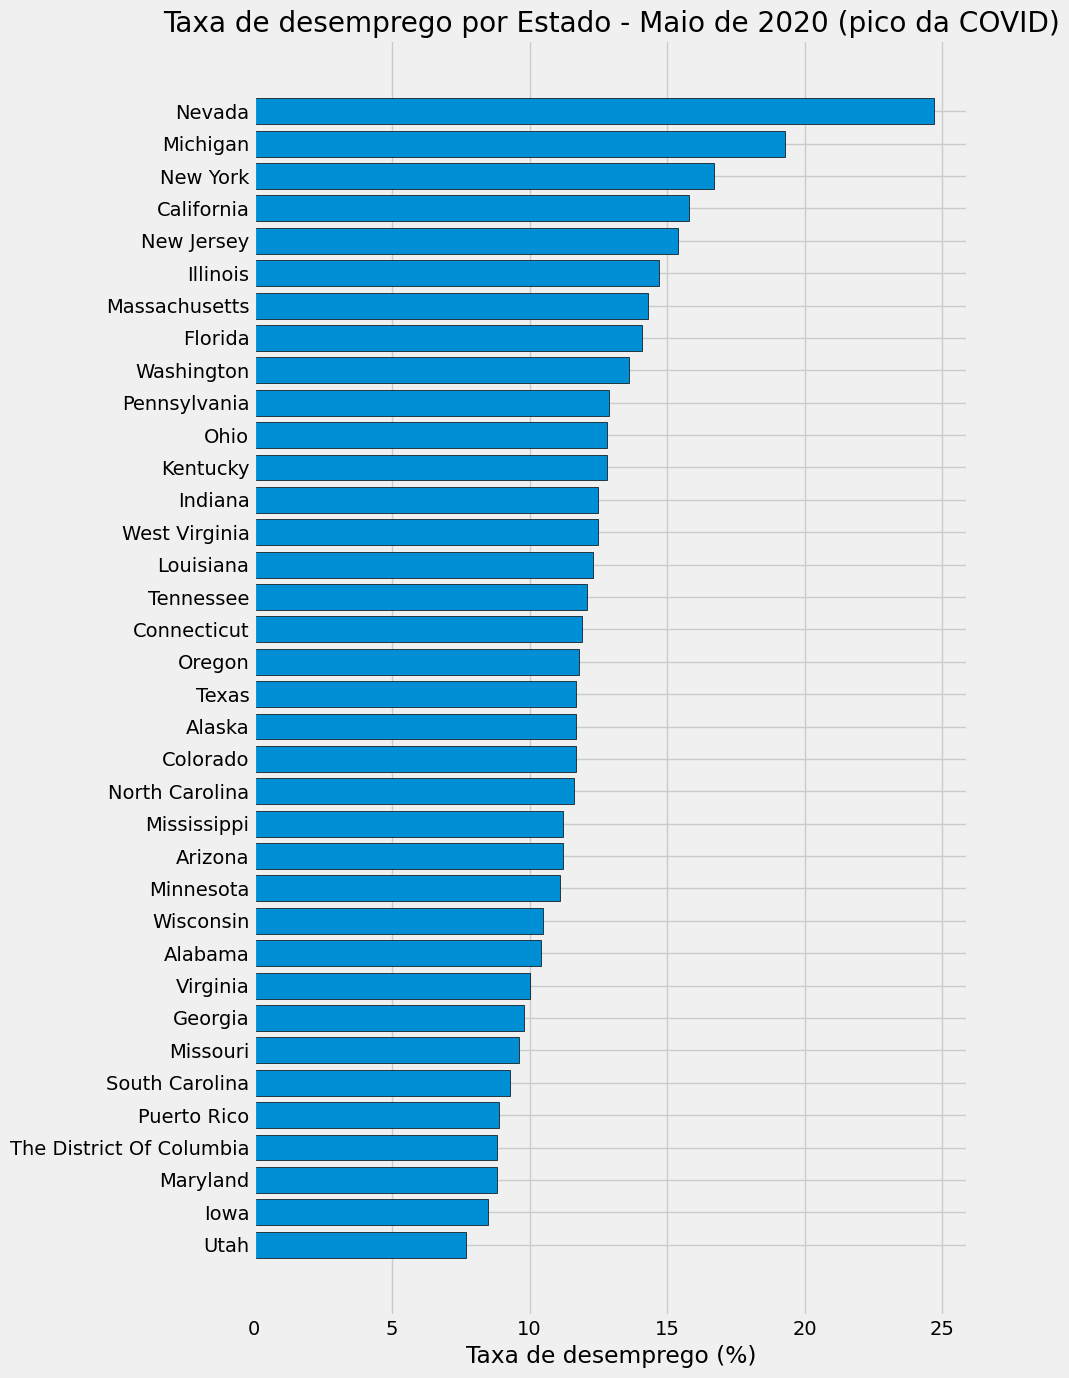

In [53]:

# Taxa de Desemprego por Estado - Maio de 2020

target_date = pd.to_datetime("2020-05-01")

if target_date in uemp_states.index:
    
    data = (
        uemp_states.loc[target_date]
        .sort_values()
    )
    
    plt.figure(figsize=(10, 14))
    
    bars = plt.barh(
        data.index,
        data.values,
        edgecolor='black'
    )
    
    plt.title("Taxa de desemprego por Estado - Maio de 2020 (pico da COVID)")
    plt.xlabel("Taxa de desemprego (%)")
    plt.tight_layout()
    plt.show()

else:
    print("Dados não encontrados no índice.")


In [37]:
# Taxa de participação

In [38]:
# Buscando Taxa de Participação da Força de Trabalho


part_df = fred.search(
    text='labor force participation rate state',
    filter=('frequency', 'Monthly')
)

# Filtrar apenas séries ajustadas sazonalmente e em percentual
part_df = part_df[
    (part_df['seasonal_adjustment'] == "Seasonally Adjusted") &
    (part_df['units'] == "Percent")
]

# Garantir que título contenha Participation Rate
part_df = part_df[
    part_df['title'].str.contains("Participation Rate", na=False)
]

# Visualizar principais colunas
part_df[['id', 'title', 'units']].head()


,id,title,units
series id,,,
CIVPART,CIVPART,Labor Force Participation Rate,Percent
LNS11300060,LNS11300060,Labor Force Participation Rate - 25-54 Yrs.,Percent
LNS11300002,LNS11300002,Labor Force Participation Rate - Women,Percent
LNS11300001,LNS11300001,Labor Force Participation Rate - Men,Percent
LNS11324230,LNS11324230,Labor Force Participation Rate - 55 Yrs. & over,Percent


In [39]:

# Construção do Dataset de Participação
#   na Força de Trabalho por Estado


# Criando dicionário: {series_id: nome_estado}
part_id_to_state = (
    part_df['title']
    .str.replace('Labor Force Participation Rate for ', '', regex=False)
    .to_dict()
)

all_results = []

for series_id in part_df.index:
    try:
        series_data = fred.get_series(series_id)
        series_df = series_data.to_frame(name=series_id)
        all_results.append(series_df)
        time.sleep(0.1)  # Evita bloqueio por excesso de requisições

    except Exception as e:
        print(f" Erro ao buscar {series_id}: {e}")

# Unindo todas as séries em um único DataFrame
part_states = pd.concat(all_results, axis=1)

# Renomeando colunas para nomes dos estados
part_states.rename(columns=part_id_to_state, inplace=True)

print(" Dataset consolidado com sucesso.")
print(f"Shape final: {part_states.shape}")


 Dataset consolidado com sucesso.
Shape final: (937, 91)


In [40]:
# Gráfico de desemprego versus participação para cada estado

In [41]:
# Padronização dos nomes dos Estados

uemp_states.columns = (
    uemp_states.columns
    .str.strip()
    .str.title()
)

print(" Nomes das colunas padronizados.")


 Nomes das colunas padronizados.


In [50]:
top5_states = uemp_states.mean().sort_values(ascending=False).head(10).index

fig = px.line(
    uemp_states[top5_states],
    title="Os 10 Estados com a Maior Taxa Média de Desemprego",
    labels={
        "value": "Taxa de desemprego (%)",
        "index": "Data",
        "variable": "Estado"
    }
)

fig.update_layout(template="plotly_white", height=600)

fig.show()


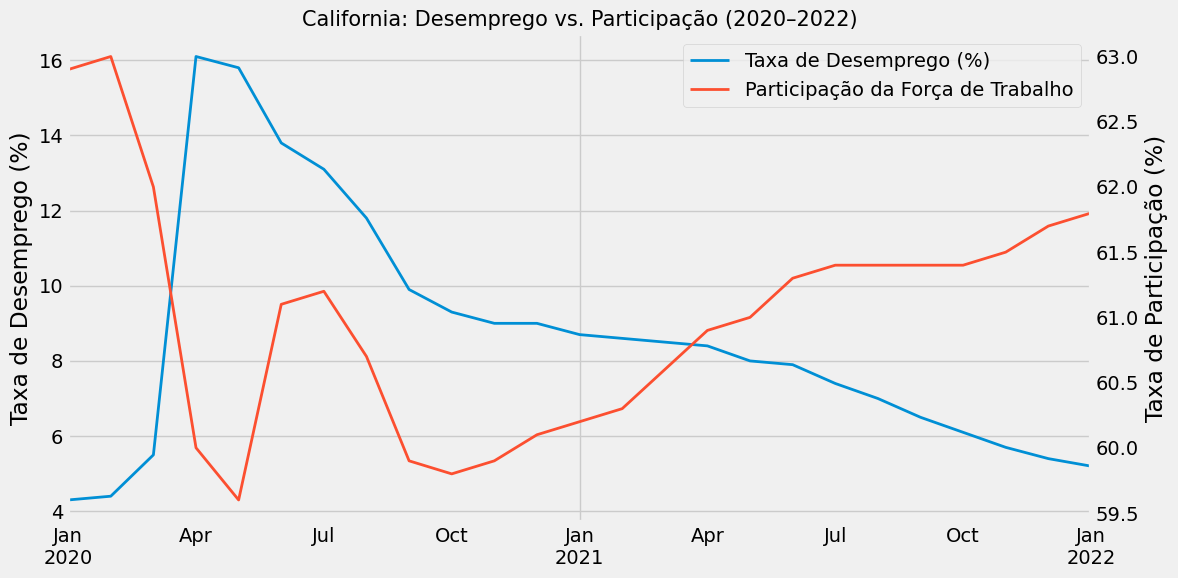

In [51]:

# Análise Individual: California
# Impacto da Pandemia (2020–2022)

state = "California"

# Garantir índice datetime
uemp_states.index = pd.to_datetime(uemp_states.index)
part_states.index = pd.to_datetime(part_states.index)

# Ajustar frequência mensal (Month Start)
uemp_states_ms = uemp_states.asfreq("MS")

# Definir período de análise
start_date = "2020-01-01"
end_date   = "2022-01-01"

# Filtrar período
uemp_filtered = uemp_states_ms.loc[start_date:end_date]
part_filtered = part_states.loc[start_date:end_date]

# Criar figura
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot Unemployment
uemp_filtered[state].plot(
    ax=ax1,
    label="Taxa de Desemprego (%)",
    linewidth=2
)

# Plot Participation
part_filtered[state].plot(
    ax=ax2,
    label="Participação da Força de Trabalho",
    color=color_pal[1],
    linewidth=2
)

# Estética
ax1.set_title(f"{state}: Desemprego vs. Participação (2020–2022)", fontsize=15)
ax1.set_ylabel("Taxa de Desemprego (%)")
ax2.set_ylabel("Taxa de Participação (%)")
ax2.grid(False)

# Legenda única
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()


In [52]:
### Observações – California (2020–2022)

# - Forte aumento do desemprego no início de 2020.
# - Queda simultânea na taxa de participação.
# - Recuperação gradual ao longo de 2021.
# - Evidência clara do choque pandêmico no mercado de trabalho.
